In [1]:
from skimage import filters
import numpy as np
import matplotlib.pyplot as plt
import intern
from intern.remote.boss import BossRemote
from PIL import Image
import os

In [2]:
#Define the Boss Remote with your API token
rmt = BossRemote({
    "protocol": "https",
    "host": "api.bossdb.org",
    "token": "9154f9b731940e65844ea3568a0d7daa94f06f8b",
})

#Define the data's location in the boss. 
COLL_NAME = 'OlfactoryBulbMicrogliaPlasticity'
EXP_NAME = 'PTSD'
CHAN_NAME = 'microgliaI'

# Grab the channel
chan = rmt.get_channel(CHAN_NAME, COLL_NAME, EXP_NAME)

#Grab the cutout from BOSS
rawMicroGlia = rmt.get_cutout(chan, 0,[460, 960], [1200, 1700], [700, 701],)
print("Data shape: " + str(rawMicroGlia.shape))

Data shape: (1, 500, 500)


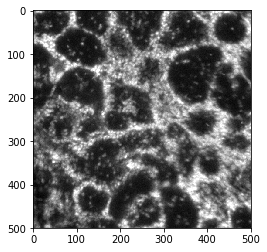

In [3]:
# Show for sanity check
plt.imshow(rawMicroGlia[0,:,:], cmap="gray")
plt.show()

In [6]:
# Make use of the Otsu method
val = filters.threshold_otsu(rawMicroGlia)
maskMicroGlia = rawMicroGlia < val

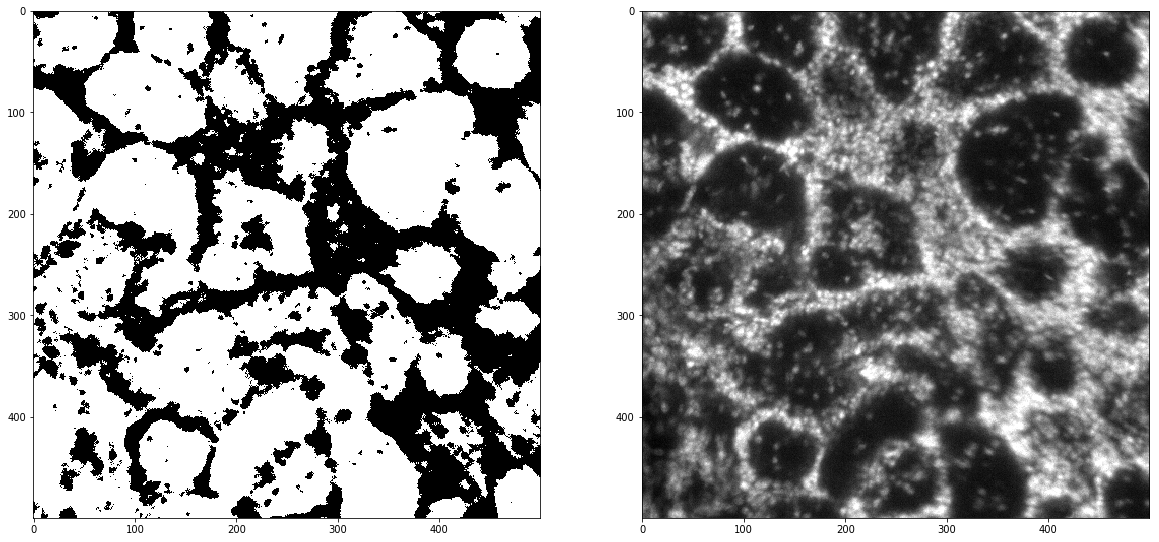

In [51]:
# Show for sanity check
f, axarr = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (5,10)
axarr[0].imshow(maskMicroGlia[0,:,:], cmap="gray")
axarr[1].imshow(rawMicroGlia[0,:,:], cmap="gray")
plt.show()

In [107]:
n = 10
l = 256
sig = l / (4. * n)
print("Sigma value used is: " + str(sig))
gaussianMicroGlia = filters.gaussian(maskMicroGlia, sigma=sig)
blobs = gaussianMicroGlia > gaussianMicroGlia.mean()

Sigma value used is: 6.4


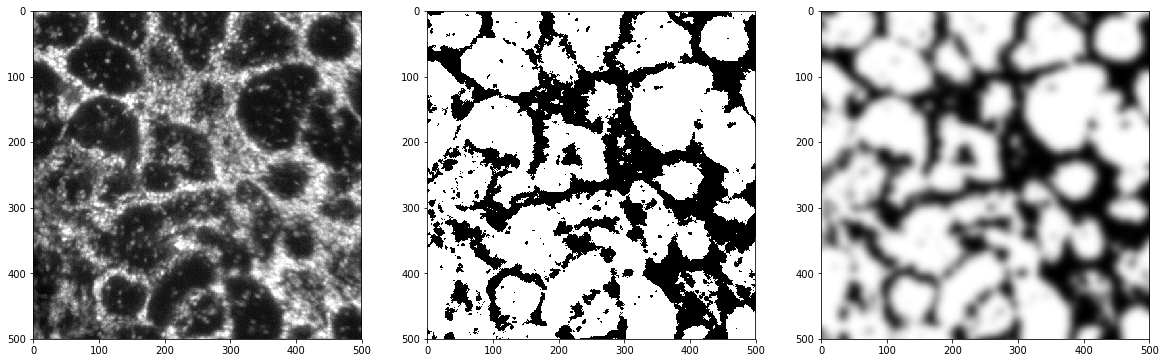

In [108]:
# Show for sanity check
plt.rcParams["figure.figsize"] = (20,20)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(rawMicroGlia[0,:,:], cmap="gray")
axarr[1].imshow(maskMicroGlia[0,:,:], cmap="gray")
axarr[2].imshow(gaussianMicroGlia[0,:,:], cmap="gray")
plt.show()

In [109]:
from skimage import measure
all_labels = measure.label(blobs)

In [113]:
blobs_labels = measure.label(blobs, background=0)

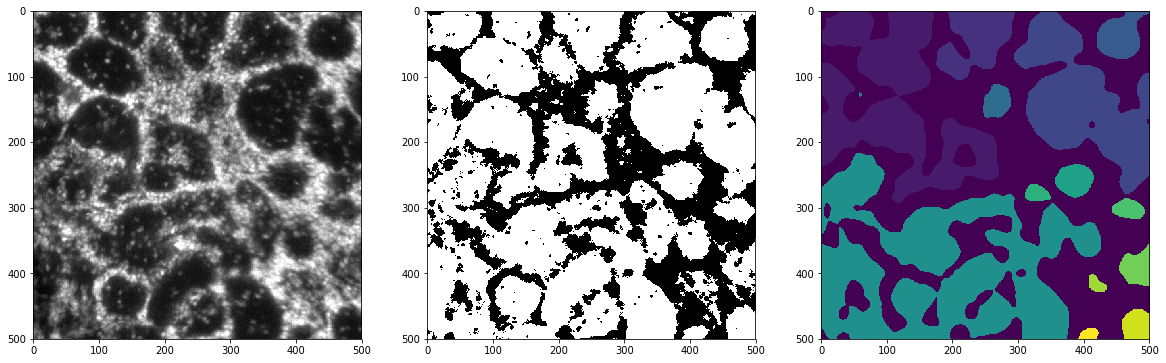

In [114]:
# Show for sanity check
plt.rcParams["figure.figsize"] = (20,20)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(rawMicroGlia[0,:,:], cmap="gray")
axarr[1].imshow(maskMicroGlia[0,:,:], cmap="gray")
axarr[2].imshow(blobs_labels[0,:,:])
plt.show()

In [115]:
comp = np.unique(blobs_labels)
print("There are " + str(len(comp)) + " microglia in this volume")

There are 15 microglia in this volume
